In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\imdb_movie_dataset.csv')
df = pd.DataFrame(df[["Title", "Genre", "Description"]])
print(df.isnull().sum())
df.head()

Title          0
Genre          0
Description    0
dtype: int64


,Title,Genre,Description
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [21]:
# df['Description'] = df['Description'].apply(str)
# df['Description']
all_genres = []
for index in df.index:
    genres_list = df.loc[index, "Genre"].replace(" ", "").split(",")
    for genre in genres_list:
        all_genres.append(genre)

genre_counts = pd.Series(all_genres).value_counts().to_dict()
genre_counts


{'Drama': 513,
 'Action': 303,
 'Comedy': 279,
 'Adventure': 259,
 'Thriller': 195,
 'Crime': 150,
 'Romance': 141,
 'Sci-Fi': 120,
 'Horror': 119,
 'Mystery': 106,
 'Fantasy': 101,
 'Biography': 81,
 'Family': 51,
 'Animation': 49,
 'History': 29,
 'Sport': 18,
 'Music': 16,
 'War': 13,
 'Western': 7,
 'Musical': 5}

C:\Users\HP\AppData\Local\Temp\ipykernel_29856\3511666591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='viridis')


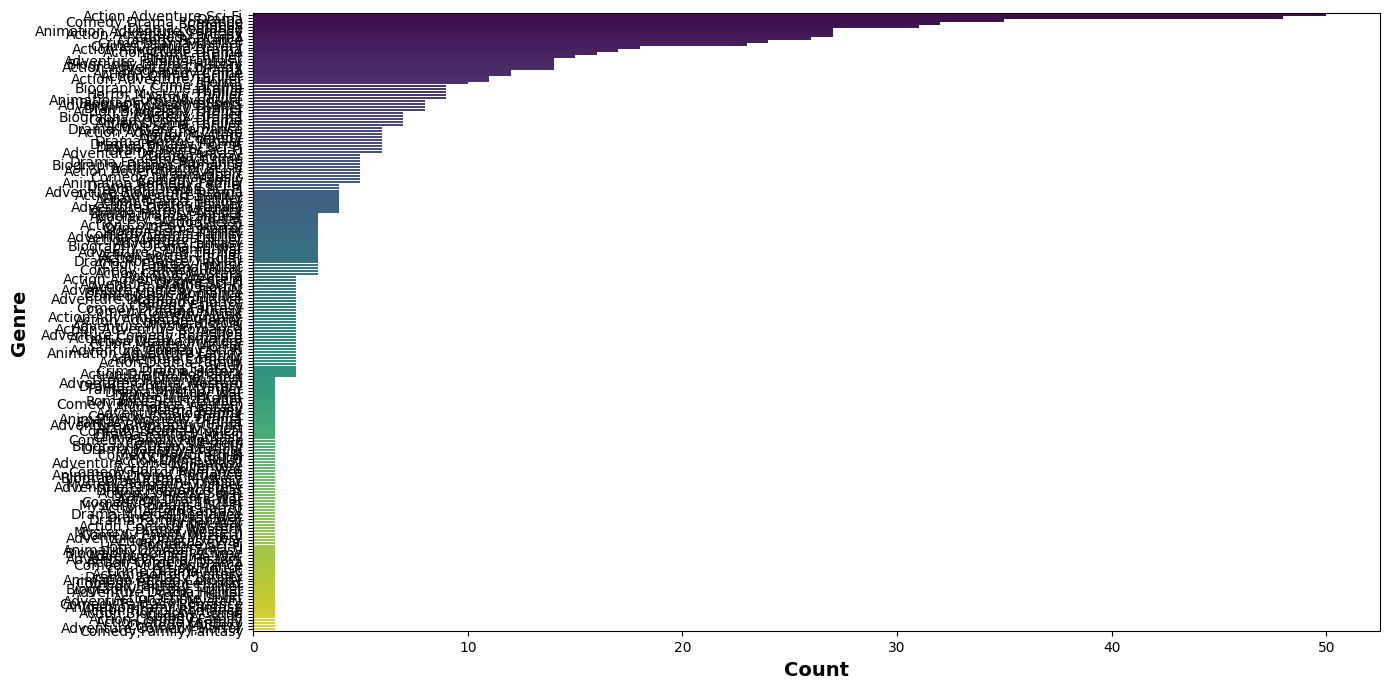

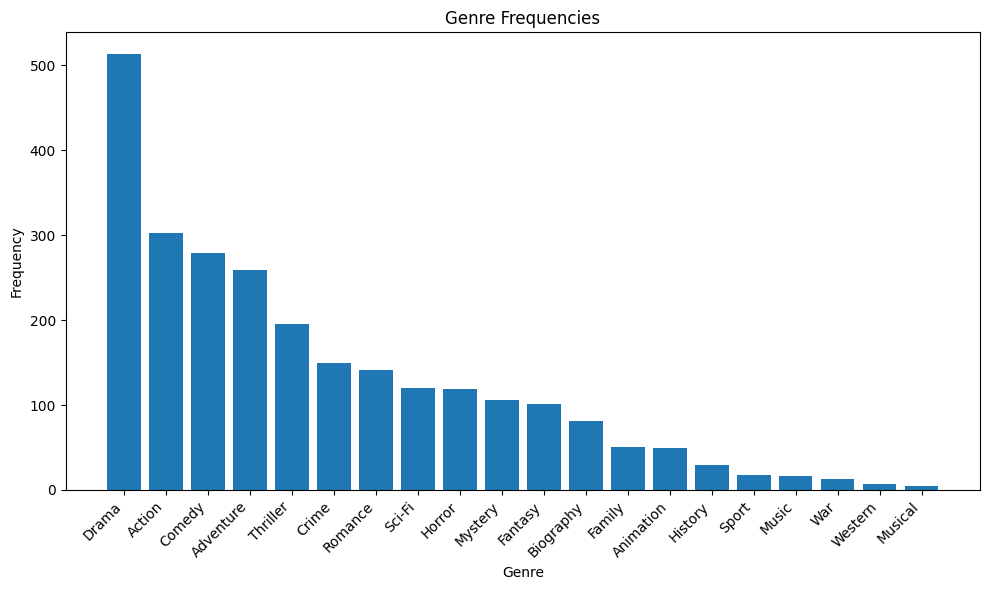

In [22]:
# Plot the distribution of genres in the training data 
plt.figure(figsize=(14, 7)) 
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='viridis') 
plt.xlabel('Count', fontsize=14, fontweight='bold') 
plt.ylabel('Genre', fontsize=14, fontweight='bold') 
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Genre Frequencies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [23]:
df.shape


(1000, 3)

In [24]:
df.describe()

,Title,Genre,Description
count,1000,1000,1000
unique,999,207,1000
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
freq,2,50,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1000 non-null   object
 1   Genre        1000 non-null   object
 2   Description  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [26]:
print(df.isnull().sum())


Title          0
Genre          0
Description    0
dtype: int64


In [27]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
type(df)
test_data = pd.DataFrame({'Description'})
df['Text_Cleaning'] =(df['Description'])
df['Text_Cleaning'] = df['Text_Cleaning'].apply(str)
df

,Title,Genre,Description,Text_Cleaning
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,A group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...","Following clues to the origin of mankind, a te..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,Three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...","In a city of humanoid animals, a hustling thea..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,A secret government agency recruits some of th...
...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...","A tight-knit team of rising investigators, alo..."
996,Hostel: Part II,Horror,Three American college students studying abroa...,Three American college students studying abroa...
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Romantic sparks occur between two dance studen...
998,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,A pair of friends embark on a mission to reuni...


In [28]:
x = df['Text_Cleaning'] # This will be the text data for TF-IDF
y = df['Genre']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

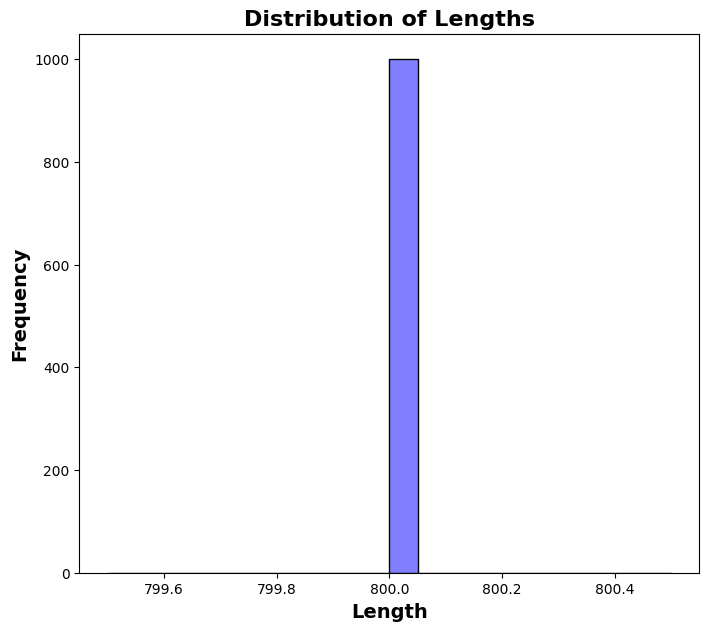

In [29]:
# Calculate the length of cleaned text
df['length_Text_cleaning'] = len(xtrain)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=df, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [30]:
print(xtrain.tolist())

['When Callum Lynch explores the memories of his ancestor Aguilar and gains the skills of a Master Assassin, he discovers he is a descendant of the secret Assassins society.', 'Fresh from prison, a street racer who was framed by a wealthy business associate joins a cross country race with revenge in mind. His ex-partner, learning of the plan, places a massive bounty on his head as the race begins.', "A college professor's bond with the abandoned dog he takes into his home.", 'As his kingdom is being threatened by the Turks, young prince Vlad Tepes must become a monster feared by his own people in order to obtain the power needed to protect his own family, and the families of his kingdom.', "A film about compromises and the implications of the parent's role.", 'A frustrated and conflicted teenager arrives at a new high school to discover an underground fight club and meet a classmate who begins to coerce him into fighting.', 'A teenage girl risks everything when she falls in love with a

In [ ]:
from collections import Counter

def create_features(text_data, all_words=None):
    # Convert text_data to a list if it's not already
    if not isinstance(text_data, list):
        text_data = text_data.tolist()
    if all_words is None:
        # Create a set of all unique words in the text data if not provided
        all_words = set()
        for text in text_data:
            if isinstance(text, str):
                words = text.split()
                all_words.update(words)
    else:
        # Convert all_words to a set if it's not already
        all_words = set(all_words)
    # Create a dictionary to store word counts for each document
    word_counts = {}
    for i, text in enumerate(text_data):
        if isinstance(text, str):
            words = text.split()
            word_counts[i] = Counter(words)

    # Create a DataFrame from the word counts, using all_words as columns
    features_df = pd.DataFrame.from_dict(word_counts, orient='index').fillna(0)
    features_df = features_df.reindex(columns=list(all_words), fill_value=0)

    return features_df

# Assuming 'df' is your DataFrame with 'Text_Cleaning' and 'Genre' columns
x = df['Text_Cleaning']
y = df['Genre']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Get all unique words from the entire dataset (x)
all_words_in_dataset = set()
for text in x:
    if isinstance(text, str):
        all_words_in_dataset.update(text.split())

# Apply the function to create features for training and test data,
# using the same vocabulary (all_words_in_dataset)
X_train = create_features(xtrain.tolist(), all_words=all_words_in_dataset)
X_test = create_features(xtest.tolist(), all_words=all_words_in_dataset)


print(X_train)
print(X_test)

     latest  Tchaikovsky's  wed,  Anna,  Brian  Chon  Ben-Hur,  custody.  \
0       0.0              0   0.0      0    0.0   0.0       0.0       0.0   
68      0.0              0   0.0      0    0.0   0.0       0.0       0.0   
81      0.0              0   0.0      0    0.0   0.0       0.0       0.0   
82      0.0              0   0.0      0    0.0   0.0       0.0       0.0   
104     0.0              0   0.0      0    0.0   0.0       0.0       0.0   
..      ...            ...   ...    ...    ...   ...       ...       ...   
231     0.0              0   0.0      0    0.0   0.0       0.0       0.0   
593     0.0              0   0.0      0    0.0   0.0       0.0       0.0   
246     0.0              0   0.0      0    0.0   0.0       0.0       0.0   
507     0.0              0   0.0      0    0.0   0.0       0.0       0.0   
695     0.0              0   0.0      0    0.0   0.0       0.0       0.0   

     ways.  Cod  ...  utopia,  alive.  Park,  uncle's  legal  bloodthirsty  \
0      0.

In [32]:
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, ytrain)
classifier2=LogisticRegression()
classifier2.fit(X_train, ytrain)
classifier3=SVC()
classifier3.fit(X_train, ytrain)

# Make predictions on the validation set  
y_pred = classifier.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
# Evaluate the performance of the model
accuracy = accuracy_score(ytest, y_pred)*100
accuracy2 = accuracy_score(ytest, y_pred2)*100
accuracy3 = accuracy_score(ytest, y_pred3)*100

# Print the classification report and accuracy
print("Validation Accuracy:", accuracy,"%") 
print(classification_report(ytest, y_pred))
print("Validation Accuracy2:", accuracy2,"%")
print(classification_report(ytest, y_pred2))
print("Validation Accuracy3:", accuracy3,"%")
print(classification_report(ytest, y_pred3))

Validation Accuracy: 2.5 %
                            precision    recall  f1-score   support

   Action,Adventure,Comedy       0.00      0.00      0.00         1
    Action,Adventure,Crime       0.00      0.00      0.00         2
    Action,Adventure,Drama       0.00      0.00      0.00         2
   Action,Adventure,Family       0.00      0.00      0.00         1
  Action,Adventure,Fantasy       0.00      0.00      0.00         8
   Action,Adventure,Horror       0.00      0.00      0.00         1
  Action,Adventure,Mystery       0.00      0.00      0.00         3
   Action,Adventure,Sci-Fi       0.05      0.33      0.08         9
    Action,Biography,Drama       0.00      0.00      0.00         2
             Action,Comedy       0.00      0.00      0.00         1
       Action,Comedy,Crime       0.00      0.00      0.00         2
     Action,Comedy,Fantasy       0.00      0.00      0.00         2
     Action,Comedy,Romance       0.00      0.00      0.00         1
        Action,Crime

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:153

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


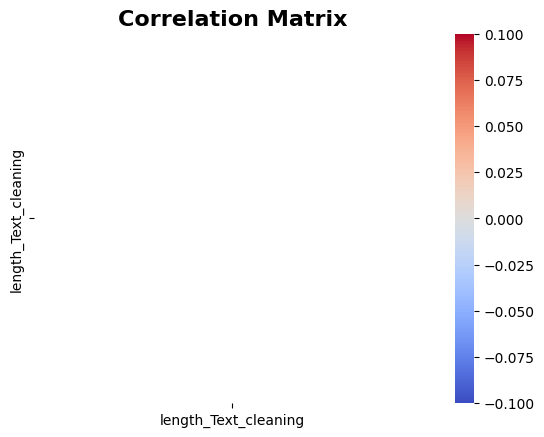

In [33]:
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numeric DataFrame
correlation_matrix = numeric_df.corr()
# Create a heatmap to visualize the correlation matrix plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix', fontsize=16, fontweight='bold') 
plt.show()

In [34]:
# Use the trained model to make predictions on the test data
test_data = pd.DataFrame({'Description': []}) 
X_test_predictions = classifier.predict(X_test) 
test_data['Predicted_Genre'] = X_test_predictions

In [35]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

     Description          Predicted_Genre
0            NaN                    Drama
1            NaN                    Drama
2            NaN  Action,Adventure,Sci-Fi
3            NaN                    Drama
4            NaN  Action,Adventure,Sci-Fi
..           ...                      ...
195          NaN  Action,Adventure,Sci-Fi
196          NaN     Comedy,Drama,Romance
197          NaN                    Drama
198          NaN                    Drama
199          NaN                    Drama

[200 rows x 2 columns]
